# Fuzzy Matching

In [2]:
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

## Constructing a naive plagirism detector

In [4]:
#Break a string into qgrams (q-character tokens)
#Pad the string with spaces on the front and end
def qgram(str,q):
    str = ' ' + str + ' '
    return([str[i:i+q] for i in range(len(str)-(q-1))])

#Compute the jaccard similarity of two strings using trigrams
def jaccard_simq(str1, str2,q,verbose=False): 
    set1 = set(qgram(str1,q)) 
    set2 = set(qgram(str2,q))
    common_tokens = set1.intersection(set2)
    all_tokens = set1.union(set2)
    if verbose:
        print('set1 =',set1)
        print('set2 =',set2)
        print('Intersection =',common_tokens)
        print('Union =',all_tokens)
        print('Common Tokens =',len(common_tokens),
              'Total Tokens =',len(all_tokens))
    return float(len(common_tokens) / len(all_tokens))

In [5]:
#example of function
jaccard_simq('the quick brown fox','fox quick brown the', 2, True)

set1 = {'ui', 'n ', 'wn', 'k ', ' t', 'x ', ' f', ' b', 'ow', 'br', 'th', 'ck', 'ox', 'e ', 'qu', 'ro', 'he', 'fo', 'ic', ' q'}
set2 = {'ui', 'n ', 'wn', 'k ', ' t', 'x ', ' f', ' b', 'ow', 'br', 'th', 'ck', 'ox', 'e ', 'qu', 'ro', 'fo', 'he', 'ic', ' q'}
Intersection = {'ui', 'n ', 'wn', 'k ', ' t', 'x ', ' f', ' b', 'ow', 'br', 'th', 'ck', 'ox', 'e ', 'qu', 'ro', 'fo', 'he', 'ic', ' q'}
Union = {'ui', 'n ', 'wn', 'k ', ' t', 'x ', ' f', ' b', 'ow', 'br', 'th', 'ck', 'ox', 'e ', 'qu', 'ro', 'he', 'fo', 'ic', ' q'}
Common Tokens = 20 Total Tokens = 20


1.0

In [6]:
jaccard_simq('the quick brown fox','fox quick brown the', 2)

1.0

In [12]:
#using wikipedia text as original reference
original = open("original.txt","r").read()

In [13]:
#five different student's responses
studentA = open("studentA.txt","r").read()
studentB = open("studentB.txt","r").read()
studentC = open("studentC.txt","r").read()
studentD = open("studentD.txt","r").read()
studentE = open("studentE.txt","r").read()

Calculating the Jaccard distances between each of the five student responses and the original Wikipedia reference for all q between 2 and 20


In [17]:
jac_tbl = Table().with_columns('q', [],
                              'A', [],
                              'B', [],
                              'C', [],
                              'D',[],
                              'E', [])

for i in np.arange(2,20):
    row = [i]
    row.append(jaccard_simq(original, studentA, i))
    row.append(jaccard_simq(original, studentB, i))
    row.append(jaccard_simq(original, studentC, i))
    row.append(jaccard_simq(original, studentD, i))
    row.append(jaccard_simq(original, studentE, i))
    jac_tbl.append(row)
jac_tbl.show(5)

q,A,B,C,D,E
2,0.713959,0.436647,0.449561,0.413242,0.454148
3,0.528192,0.261528,0.232156,0.244681,0.2847
4,0.457965,0.162698,0.128345,0.17714,0.200939
5,0.42492,0.108565,0.0793766,0.150758,0.166093
6,0.402108,0.0777298,0.0480556,0.131777,0.147793


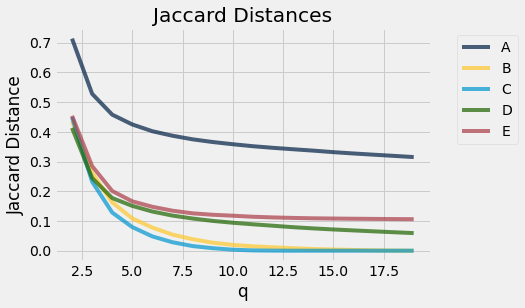

In [18]:
#plot the jaccard distances for each student 
jac_tbl.plot('q')
plots.title('Jaccard Distances')
plots.ylabel('Jaccard Distance')
plots.show()

### Findings
A may have some plagarism. The rest start at a high similarity sure to short tokens, but the jaccard distance quickly decreases to below 0.11 for students B,C,D, and E as the tokens increase in length (plagirism is unlikely). However, student A's jaccard distance starts much higher than the rest, and even though it decreases as token length increases, it does not go lower than 0.3. Thus, even at the sentence length (20 tokens), there is still high similarity. 

### Does the length of text matter?

In [19]:
[len(original), len(studentA), len(studentB), len(studentC), len(studentD), len(studentE)]

[3098, 1243, 1368, 1076, 493, 610]

Yes, the length of the text matters. A shorter paper will have a shorter jaccard distance. If the text and original are the same then the intersection is equal to the total tokens of the text (same as original). The union is the total tokens, and the jaccard distance is ultimately 1. If you take a shorter portion of the text and compare it to the same original, the maximum intersection can only be as long as the text (the inersecion length decreases). However, the intersection still carries the original text and therefore stays large in comparison. Thus, the jaccard distance decreases with a shorter text (even if it is fully plagarized). 

This is important for our five student scenario because the length of student A, B, and C's papers are substantially longer than students D and E (about 2x as long). Therefore, if a shorter text has a higher jaccard score (compared to a longer text) the text is more likely to have been plagarized. Ultimately, text length should be taken into account when using jaccard distances to evaluate plagarism. 
